<a href="https://colab.research.google.com/github/ankitakundra/pytorch_digit_recognition/blob/master/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision 
from torchvision import transforms,datasets
train = datasets.MNIST("",train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

9920512it [00:01, 9039771.46it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136498.61it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:00, 2298610.91it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


8192it [00:00, 51166.88it/s]            

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train,batch_size =10, shuffle = True)
testset = torch.utils.data.DataLoader(test,batch_size =10, shuffle = True)

for data in trainset:
  print(data)
  break
y = data[1][0]
print(y)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.imshow(data[0][0].view(28,28))
plt.show()
print(data[0][0].shape)


In [0]:
total = 0
counter_dict  = {0:0, 1:0, 2:0, 3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  xs,ys = data
  for y in ys:
    counter_dict[int(y)]+=1
    total+=1
    
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [0]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total * 100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)
    
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
 
    return F.log_softmax(x,dim = 1)

net = Net()
print(net)
    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X  = torch.rand((28,28))
X = X.view(1,28*28)

In [0]:
output = net(X)

In [0]:
output

tensor([[-2.2236, -2.3153, -2.3245, -2.3740, -2.2748, -2.3066, -2.3557, -2.2610,
         -2.2573, -2.3435]], grad_fn=<LogSoftmaxBackward>)

In [0]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3
for epoch in range(EPOCHS):
  for data in trainset:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.1018, grad_fn=<NllLossBackward>)
tensor(0.0090, grad_fn=<NllLossBackward>)
tensor(0.0097, grad_fn=<NllLossBackward>)


In [0]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X,y = data
    output = net(X.view(-1,28*28))
    for idx,i in enumerate(output):
      if torch.argmax(i )== y[idx]:
        correct +=1
      total +=1
      
print("Accuracy: ",round(correct/total,3))
                      

Accuracy:  0.978


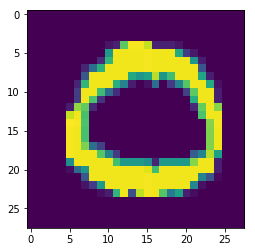

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [0]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(0)
